In [1]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"


In [2]:
from modules.uploadData import *
from modules.getData import *

zip_data("gd_dataset")
# get_data_from_github("goose_ducks_dataset")

data directory exists.
data\zip directory exists.
Did not find data\zip\gd_dataset, creating one...
Did not find data\zip\gd_dataset\train, creating one...
Did not find data\zip\gd_dataset\test, creating one...
Did not find data\zip\gd_dataset\train\duck, creating one...
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory exists.
data\zip\gd_dataset\train\duck directory e

In [3]:
NUM_EPOCHS = 20
BATCH_SIZE = 64
HIDDEN_UNITS = 64
LEARNING_RATE = 0.001

In [4]:
import torchvision.transforms as transforms

train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
from modules.data_setup import create_dataloaders
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir = "data/gd_dataset/test",
    test_dir = "data/gd_dataset/train",
    batch_size=32,
    train_transform=train_transform,
    test_transform=test_transform
)

In [6]:
from modules.model_builder_SimpleCNN import SimpleCNN
torch.manual_seed(42)
model_2 = SimpleCNN(input_shape=3, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)

model_2

SimpleCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

In [7]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(),
                                 lr=LEARNING_RATE)
# weight_decay=1e-4

In [ ]:
from modules import engine
model_2_results = engine.train(
        model=model_2, 
        train_dataloader=train_dataloader, 
        test_dataloader=test_dataloader, 
        optimizer=optimizer,
        loss_fn=loss_fn, 
        epochs=NUM_EPOCHS,
        device=device
    )

c:\Users\gabry\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\gabry\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/20 [00:00<?, ?it/s]

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 2])
torch.Size([28, 10, 32, 32])
torch.Size([28, 10, 16, 16])
torch.Size([28, 2])


  0%|          | 0/20 [00:09<?, ?it/s]


KeyboardInterrupt: 

: 

In [ ]:
# from modules.utils import save_model

# save_model(
#     model=model_2, 
#     target_directory="models", 
#     model_name="model_2_SimpleCNN.pth",
#     )

Saving model to models\model_2_SimpleCNN.pth


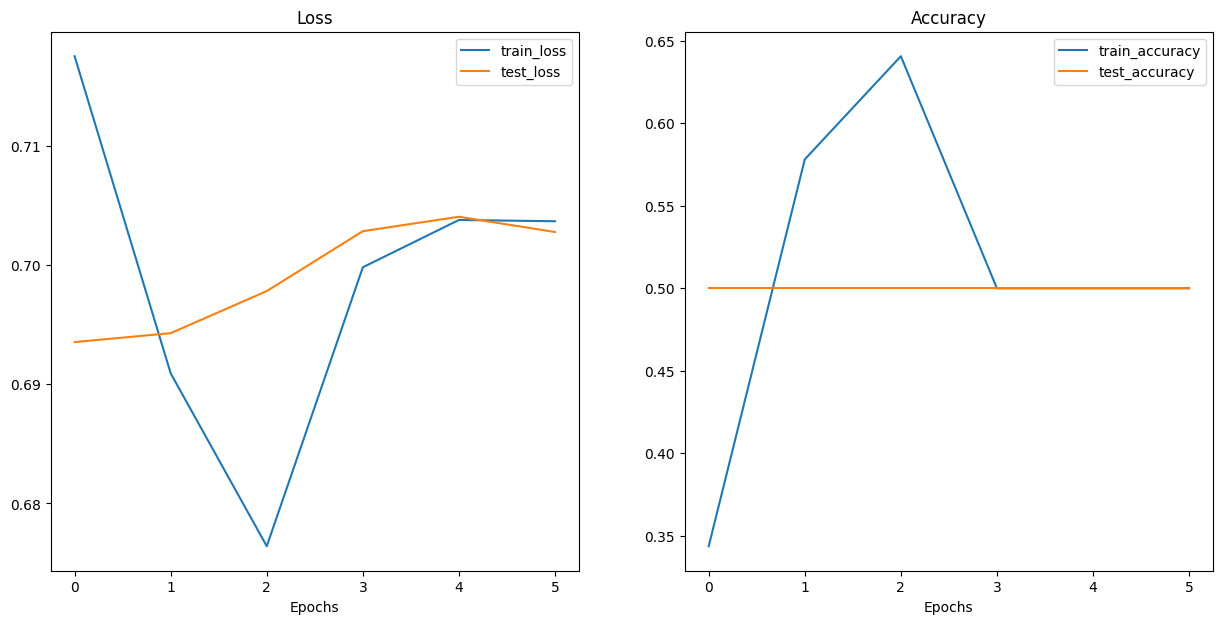

In [ ]:
from modules.plots import plot_loss_curves


plot_loss_curves(model_2_results)

torch.Size([1, 10, 32, 32])
torch.Size([1, 10, 16, 16])
torch.Size([1, 2])


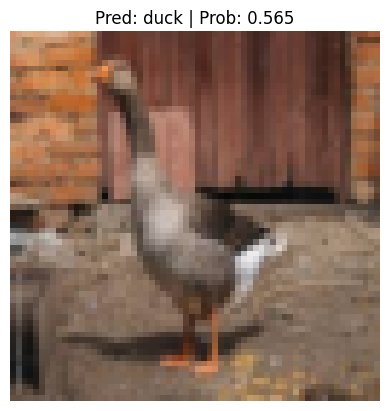

In [ ]:
from modules.plots import pred_and_plot_image
import torch

custom_image_path = "data/my_goose2.jpg"
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

pred_and_plot_image(model=model_2,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)